In [ ]:
import pandas as pd
import glob
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
# Standard plotly imports
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
# Changing the default render
py.io.renderers.default = 'colab'


In [ ]:
# Folder to save scraped files
#raw_data = "G:/Google Drive/Colab Notebooks/investHub/data/raw/"
raw_data = "/content/drive/MyDrive/Colab Notebooks/investHub/data/raw/"
data_files = [path.normpath(i).replace('\\','/') for i in glob.glob(raw_data + '*.csv')]


In [ ]:
full_df = pd.DataFrame()
for file_name in data_files:
    df = pd.read_csv(file_name,sep=';',header=None)
    df.iloc[0,0] = 'Ano'
    df.iloc[:,0] = df.iloc[:,0].str.replace('&nbsp','')
    df = df.transpose()
    df.columns = df.iloc[0]
    df = df.drop(df.index[0])
    df['Ticker'] = path.splitext(path.basename(file_name))[0]
    full_df = pd.concat([full_df,df])

In [ ]:
full_df.info()
full_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3452 entries, 1 to 15
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Ano            3452 non-null   object
 1   LPA            3452 non-null   object
 2   P/L            3452 non-null   object
 3   VPA            3452 non-null   object
 4   P/VP           3452 non-null   object
 5   P/EBIT         3187 non-null   object
 6   P/EBITDA       3187 non-null   object
 7   P/Ativos       3187 non-null   object
 8   Ebitda         3187 non-null   object
 9   Marg. Ebitda   3187 non-null   object
 10  PSR            3187 non-null   object
 11  ROE            3452 non-null   object
 12  ROA            3187 non-null   object
 13  ROIC           3187 non-null   object
 14  EV/EBIT        3187 non-null   object
 15  EV/EBITDA      3187 non-null   object
 16  Div. Yield     3452 non-null   object
 17  Div. Payout    3452 non-null   object
 18  Beta           3452 non-null  

,Ano,LPA,P/L,VPA,P/VP,P/EBIT,P/EBITDA,P/Ativos,Ebitda,Marg. Ebitda,PSR,ROE,ROA,ROIC,EV/EBIT,EV/EBITDA,Div. Yield,Div. Payout,Beta,Valorização,Negócios/dia,Volume diário,Ticker
1,2020,0.09,134.45,3.45,3.67,86.69,0.00,2.71,0,0%,10.46,3%,2%,7%,65.78,0.00,"0,40%",0%,0.28,4%,2242,30,BOAS3
2,2021,0.09,130.65,3.49,3.31,91.06,0.00,2.48,0,0%,9.52,3%,2%,6%,73.32,0.00,"0,61%",0%,0.54,-9%,2499,12,BOAS3
1,1998,19.53,4.69,302.40,0.30,2.05,0.00,0.17,0,0%,0.82,6%,4%,9%,24.77,0.00,"0,00%",0%,0.00,-68%,63,2,SBSP3
2,1999,-8.23,-25.78,290.85,0.73,4.59,0.00,0.40,0,0%,1.86,-3%,-2%,9%,24.15,0.00,"0,00%",0%,0.00,123%,72,2,SBSP3
3,2000,18.33,9.49,290.32,0.60,3.73,0.00,0.33,0,0%,1.48,6%,3%,9%,24.00,0.00,"0,00%",0%,0.76,-17%,109,3,SBSP3


In [ ]:
def parseToNumeric(x):
    x = x.str.replace(',','.')
    x = x.str.rstrip('%').astype('float') / 100.0
    return x

In [ ]:
clean_df = full_df.copy()
clean_df.rename(columns = {'P/L':'P_L',
                           'P/VP':'P_VP',
                           'P/EBIT':'P_EBIT',
                           'P/EBITDA':'P_EBITDA',
                           'P/Ativos':'P_Ativos',
                           'Marg. Ebitda':'Marg_Ebitda',
                           'EV/EBIT':'EV_EBIT',
                           'EV/EBITDA':'EV_EBITDA',
                           'Div. Yield':'Div_Yield',
                           'Div. Payout':'Div_Payout',
                           'Valorização':'Valorizacao',
                           'Negócios/dia':'Negocios_dia',
                           'Volume diário':'Volume_diario'},
               inplace = True)

clean_df[['Marg_Ebitda','ROE', 'ROA', 'ROIC', 'Div_Yield', 'Div_Payout', 'Valorizacao']] = \
clean_df[['Marg_Ebitda','ROE', 'ROA', 'ROIC', 'Div_Yield', 'Div_Payout', 'Valorizacao']].apply(parseToNumeric)

clean_df[['Ano', 'LPA', 'P_L', 'VPA', 'P_VP', 'P_EBIT', 'P_EBITDA', 'P_Ativos',
       'Ebitda', 'PSR', 'EV_EBIT', 'EV_EBITDA', 'Beta','Negocios_dia', 'Volume_diario']] = \
clean_df[['Ano', 'LPA', 'P_L', 'VPA', 'P_VP', 'P_EBIT', 'P_EBITDA', 'P_Ativos',
       'Ebitda', 'PSR', 'EV_EBIT', 'EV_EBITDA', 'Beta','Negocios_dia', 'Volume_diario']].apply(pd.to_numeric)

clean_df.info()
clean_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3452 entries, 1 to 15
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ano            3452 non-null   int64  
 1   LPA            3452 non-null   float64
 2   P_L            3452 non-null   float64
 3   VPA            3452 non-null   float64
 4   P_VP           3452 non-null   float64
 5   P_EBIT         3187 non-null   float64
 6   P_EBITDA       3187 non-null   float64
 7   P_Ativos       3187 non-null   float64
 8   Ebitda         3187 non-null   float64
 9   Marg_Ebitda    3187 non-null   float64
 10  PSR            3187 non-null   float64
 11  ROE            3452 non-null   float64
 12  ROA            3187 non-null   float64
 13  ROIC           3187 non-null   float64
 14  EV_EBIT        3187 non-null   float64
 15  EV_EBITDA      3187 non-null   float64
 16  Div_Yield      3452 non-null   float64
 17  Div_Payout     3452 non-null   float64
 18  Beta      

,Ano,LPA,P_L,VPA,P_VP,P_EBIT,P_EBITDA,P_Ativos,Ebitda,Marg_Ebitda,PSR,ROE,ROA,ROIC,EV_EBIT,EV_EBITDA,Div_Yield,Div_Payout,Beta,Valorizacao,Negocios_dia,Volume_diario,Ticker
1,2020,0.09,134.45,3.45,3.67,86.69,0.0,2.71,0.0,0.0,10.46,0.03,0.02,0.07,65.78,0.0,0.0040,0.0,0.28,0.04,2242,30,BOAS3
2,2021,0.09,130.65,3.49,3.31,91.06,0.0,2.48,0.0,0.0,9.52,0.03,0.02,0.06,73.32,0.0,0.0061,0.0,0.54,-0.09,2499,12,BOAS3
1,1998,19.53,4.69,302.40,0.30,2.05,0.0,0.17,0.0,0.0,0.82,0.06,0.04,0.09,24.77,0.0,0.0000,0.0,0.00,-0.68,63,2,SBSP3
2,1999,-8.23,-25.78,290.85,0.73,4.59,0.0,0.40,0.0,0.0,1.86,-0.03,-0.02,0.09,24.15,0.0,0.0000,0.0,0.00,1.23,72,2,SBSP3
3,2000,18.33,9.49,290.32,0.60,3.73,0.0,0.33,0.0,0.0,1.48,0.06,0.03,0.09,24.00,0.0,0.0000,0.0,0.76,-0.17,109,3,SBSP3


In [ ]:
print(clean_df.isna().sum())
clean_df[clean_df.isna().any(axis=1)]

0
Ano                0
LPA                0
P_L                0
VPA                0
P_VP               0
P_EBIT           265
P_EBITDA         265
P_Ativos         265
Ebitda           265
Marg_Ebitda      265
PSR              265
ROE                0
ROA              265
ROIC             265
EV_EBIT          265
EV_EBITDA        265
Div_Yield          0
Div_Payout         0
Beta               0
Valorizacao        0
Negocios_dia       0
Volume_diario      0
Ticker             0
dtype: int64


,Ano,LPA,P_L,VPA,P_VP,P_EBIT,P_EBITDA,P_Ativos,Ebitda,Marg_Ebitda,PSR,ROE,ROA,ROIC,EV_EBIT,EV_EBITDA,Div_Yield,Div_Payout,Beta,Valorizacao,Negocios_dia,Volume_diario,Ticker
1,2008,0.07,5.52,0.64,0.63,NaN,NaN,NaN,NaN,NaN,NaN,0.11,NaN,NaN,NaN,NaN,0.0750,0.09,0.66,-0.59,59,0,BAZA3
2,2009,0.01,75.26,0.64,1.03,NaN,NaN,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,0.0606,0.00,-0.13,0.66,116,1,BAZA3
3,2010,0.05,11.27,0.65,0.83,NaN,NaN,NaN,NaN,NaN,NaN,0.07,NaN,NaN,NaN,NaN,0.0370,0.00,0.70,-0.15,156,1,BAZA3
4,2011,0.03,15.20,0.65,0.61,NaN,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,0.0500,0.00,0.43,-0.23,27,0,BAZA3
5,2012,0.06,6.65,0.68,0.54,NaN,NaN,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN,0.0811,0.00,0.00,0.03,13,0,BAZA3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,2017,2.14,14.93,15.89,2.01,NaN,NaN,NaN,NaN,NaN,NaN,0.13,NaN,NaN,NaN,NaN,0.0461,0.68,1.24,0.14,7516,50,SANB11
10,2018,3.26,13.11,17.46,2.45,NaN,NaN,NaN,NaN,NaN,NaN,0.19,NaN,NaN,NaN,NaN,0.0255,0.50,1.26,0.35,8613,64,SANB11
11,2019,3.76,13.18,18.59,2.66,NaN,NaN,NaN,NaN,NaN,NaN,0.20,NaN,NaN,NaN,NaN,0.0422,0.49,1.12,0.13,8036,74,SANB11
12,2020,3.75,11.96,21.12,2.12,NaN,NaN,NaN,NaN,NaN,NaN,0.18,NaN,NaN,NaN,NaN,0.0627,0.72,1.07,-0.06,13509,103,SANB11


In [ ]:
clean_df.dropna(inplace=True)
clean_df.describe().round(2)

,Ano,LPA,P_L,VPA,P_VP,P_EBIT,P_EBITDA,P_Ativos,Ebitda,Marg_Ebitda,PSR,ROE,ROA,ROIC,EV_EBIT,EV_EBITDA,Div_Yield,Div_Payout,Beta,Valorizacao,Negocios_dia,Volume_diario
count,3187.00,3187.00,3187.00,3187.00,3187.00,3187.00,3187.00,3187.00,3187.00,3187.00,3187.00,3187.00,3187.00,3187.00,3187.00,3187.00,3187.00,3187.00,3187.00,3187.00,3187.00,3187.00
mean,2013.77,6.27,11.54,67.91,2.12,9.22,7.61,3.40,2094.56,0.16,2.68,0.10,0.03,0.08,33.16,24.20,0.03,0.30,0.67,0.23,3617.88,35.15
std,5.46,319.52,133.11,2940.51,30.99,88.22,91.79,136.63,9416.29,0.52,12.59,0.69,0.18,0.28,227.67,195.75,0.06,0.78,1.56,0.68,6832.71,114.81
min,1998.00,-666.67,-3856.92,-695.02,-1714.19,-3856.92,-3675.01,0.00,-26555.00,-7.92,-0.82,-9.37,-2.54,-4.72,-4262.93,-1756.27,0.00,-9.00,-34.89,-0.96,0.00,0.00
25%,2010.00,0.16,4.24,4.22,0.82,3.69,1.56,0.34,26.50,0.03,0.58,0.04,0.01,0.05,8.11,3.94,0.00,0.00,0.35,-0.16,53.00,1.00
50%,2015.00,0.88,9.88,8.88,1.52,7.39,5.11,0.64,308.00,0.15,1.21,0.12,0.05,0.09,15.88,10.44,0.02,0.18,0.60,0.10,612.00,5.00
75%,2018.00,2.26,20.01,18.39,2.85,13.77,9.72,1.17,1369.50,0.27,2.44,0.21,0.08,0.15,34.10,19.65,0.04,0.44,0.90,0.44,4135.50,27.00
max,2021.00,18000.00,928.23,166000.00,133.39,1376.11,2773.09,7713.85,187142.00,6.09,489.61,7.67,3.16,4.00,4836.20,8073.90,1.10,9.38,42.37,8.02,59190.00,2913.00


In [ ]:
#plt.figure(figsize=(26, 6))
#heatmap = sns.heatmap(clean_df.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
#heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
corrs = clean_df.corr()
fig = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True,
    colorscale = 'Reds')
fig.update_layout(title_text='Correlation Heatmap')
fig.show()

Text(0.5, 1.0, 'Features Correlating with Valorização')

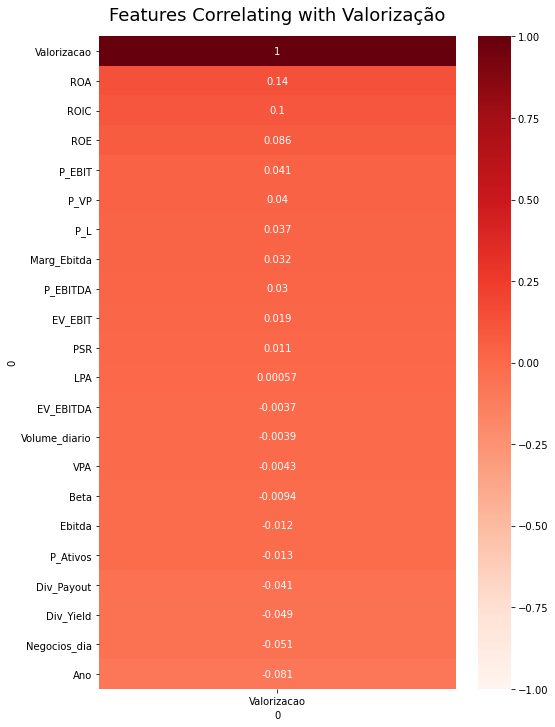

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(clean_df.corr()[['Valorizacao']].sort_values(by='Valorizacao', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Reds')
heatmap.set_title('Features Correlating with Valorização', fontdict={'fontsize':18}, pad=16)

In [48]:
clean_df['Valorizacao'].iplot(kind='hist', xTitle='Valorização',
                  yTitle='count', title='Valorização Distribution',
                  colors="Red")

clean_df['Valorizacao'].iplot(kind='box', yTitle='Valorização',
        title='Valorização Distribution',
        colors="Red")

In [ ]:
#normalized_df = (clean_df.iloc[:,0:22]-clean_df.iloc[:,0:22].min())/(clean_df.iloc[:,0:22].max()-clean_df.iloc[:,0:22].min())
#normalized_df.head()

In [ ]:
# Save clean data set to a csv
# Folder to save scraped files
folder = "/content/drive/MyDrive/Colab Notebooks/investHub/data/clean/"
clean_df.to_csv(folder + 'clean_dataset.csv', index=False, sep=';')

In [ ]:
# Instalação do pandas_profiling 
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [45]:
import pandas_profiling as pp

profile = pp.ProfileReport(clean_df)
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.